The dataset contains the following columns:

* Date : The trading date in string format (e.g., "01-03-2006").
* Open: The opening price of the stock for the given date.
* High: The highest price of the stock on the given date.
* Low: The lowest price of the stock on the given date.
* Close: The closing price of the stock on the given date.
* Volume: The number of shares traded on the given date.
* Name: The stock's ticker symbol (e.g., "AABA").

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [30]:
df = pd.read_csv('/content/stock_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,01-03-2006,39.69,41.22,38.79,40.91,24232729,AABA
1,01-04-2006,41.22,41.90,40.77,40.97,20553479,AABA
2,01-05-2006,40.93,41.73,40.85,41.53,12829610,AABA
3,01-06-2006,42.88,43.57,42.80,43.21,29422828,AABA
4,01-09-2006,43.10,43.66,42.82,43.42,16268338,AABA


In [31]:
df.shape

(3019, 7)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


Remove any unnecessary columns if there is a noisy column in your data.

In [33]:
# Here we are taking date as the index for further analysis.
df.index = pd.to_datetime(df['Date'], format='mixed')
df.head()

,Date,Open,High,Low,Close,Volume,Name
Date,,,,,,,
2006-01-03,01-03-2006,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,01-04-2006,41.22,41.90,40.77,40.97,20553479,AABA
2006-01-05,01-05-2006,40.93,41.73,40.85,41.53,12829610,AABA
2006-01-06,01-06-2006,42.88,43.57,42.80,43.21,29422828,AABA
2006-01-09,01-09-2006,43.10,43.66,42.82,43.42,16268338,AABA


Here we'll be dropping Date column since we have it on index and name column since it's of no particular use as of now.

In [34]:
df.drop(columns=['Date','Name'], inplace=True)

In [35]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.69,41.22,38.79,40.91,24232729
2006-01-04,41.22,41.90,40.77,40.97,20553479
2006-01-05,40.93,41.73,40.85,41.53,12829610
2006-01-06,42.88,43.57,42.80,43.21,29422828
2006-01-09,43.10,43.66,42.82,43.42,16268338


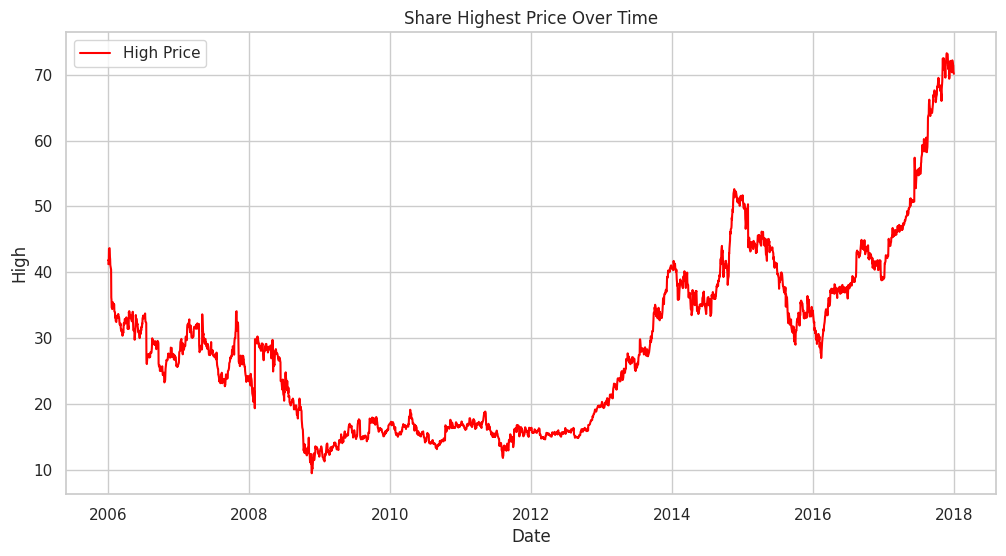

In [36]:

# Assuming df is your DataFrame
sns.set(style="whitegrid")  # Setting the style to whitegrid for a clean background

plt.figure(figsize=(12, 6))  # Setting the figure size
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Share Highest Price Over Time')

plt.show()

Line Graph of 'high' column over time to gauge out the pattern of trend (date wise)

<ipython-input-37-14e2d9ccd0c8>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df.resample('M').mean()


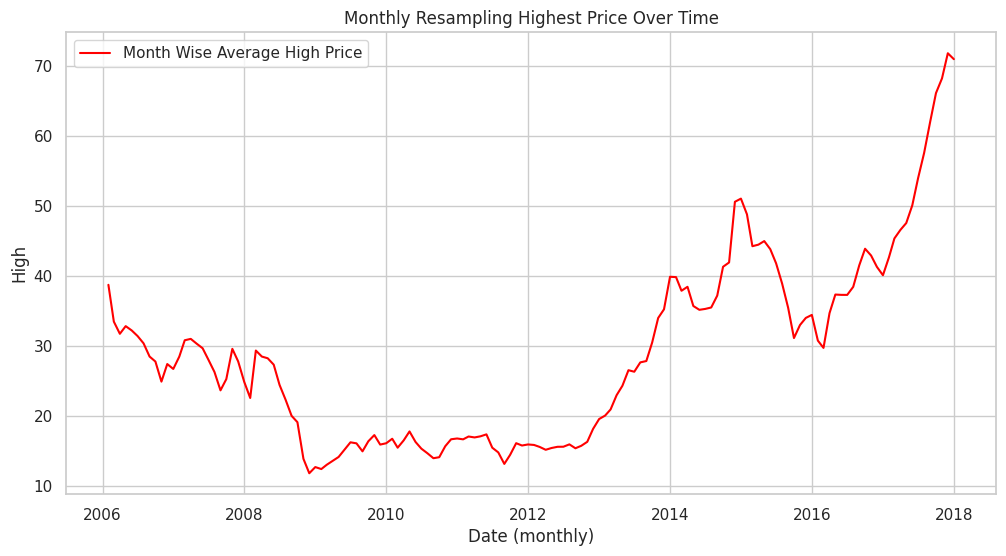

In [37]:
df_resampled = df.resample('M').mean()

# df_resampled
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled,x = df_resampled.index, y='High', label='Month Wise Average High Price', color='red')

plt.xlabel('Date (monthly)')
plt.ylabel('High')
plt.title('Monthly Resampling Highest Price Over Time')
plt.show()

Here we can notice smoother curves since we are using collective Month data instead of daily.

---

Checking for Seasonality in the dataset using Auto Correlation.

<Figure size 1200x600 with 0 Axes>

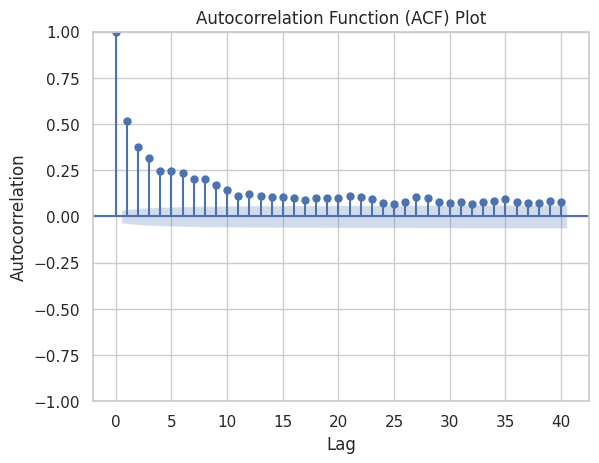

In [38]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(df['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

Usually there are peaks or spikes at regular intervals. As we don't see any, there is no seasonality in our dataset.


---

Detecting Stationarity in the dataset.

In [39]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['High'])
# result
print('ADF Statistics : ', result[0])
print('p-Value : ', result[1])
print('Critical Region : ', result[4])

ADF Statistics :  0.7671404880535936
p-Value :  0.9910868050318213
Critical Region :  {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


The above test is based on hypothesis :
* Null Hypothesis : that a unit root is present in the series, indicating that the series is non-stationary
* Alternate Hypothesis : is that the series is stationary after differencing(having no unit root)

**Test Result**
* Since the ADF Statistics > all the Critical Values we accept the Null hypothesis and conclude that the data do not appear to the augmented Dickey -fuller test
* This suggests that differencing or other transformations may be needed to achieve stationary before applying certain time seties models



---

Now smoothing the data using Differencing and Moving Average.

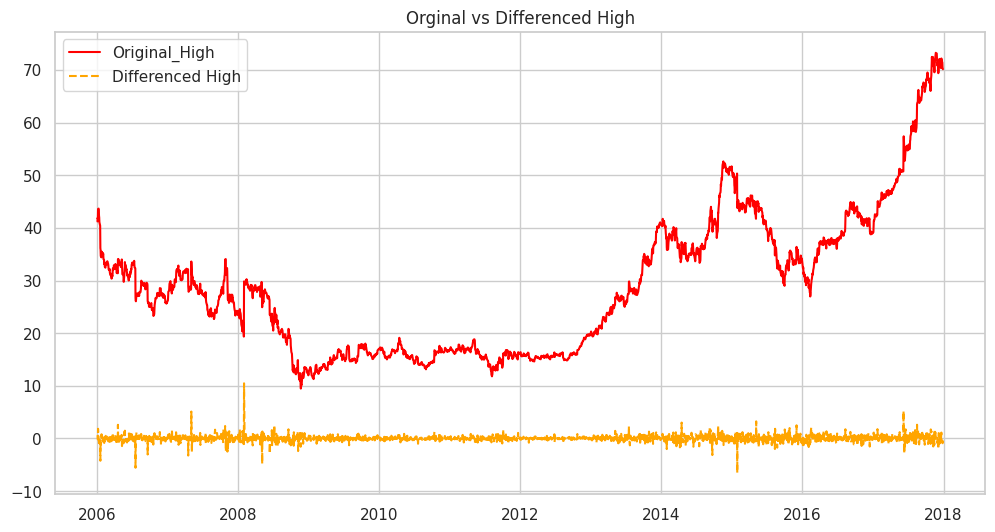

In [40]:
df['high_diff'] = df['High'].diff()

plt.figure(figsize = (12,6))
plt.plot(df['High'], label='Original_High', color='red')
plt.plot(df['high_diff'], label='Differenced High', linestyle='--', color='orange')
plt.legend()
plt.title("Orginal vs Differenced High")
plt.show()

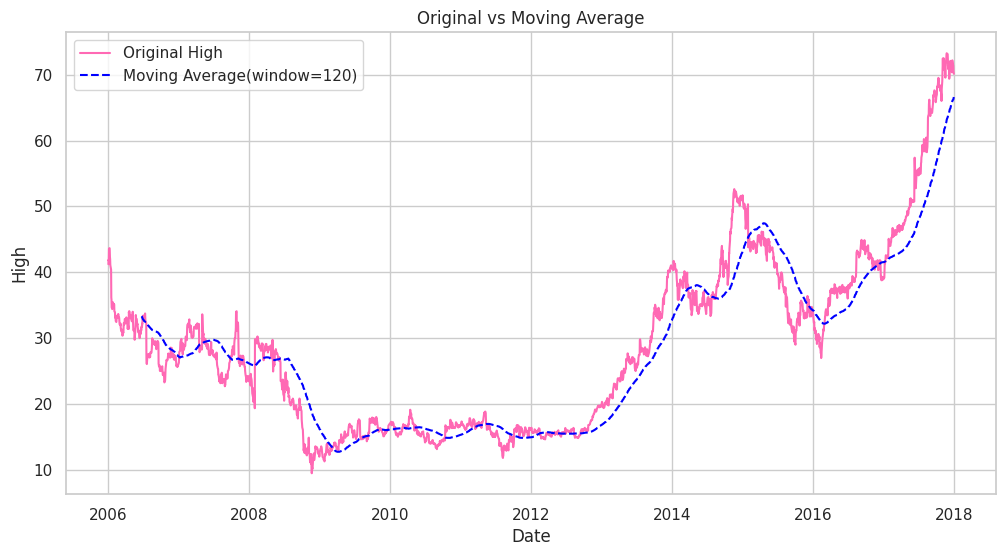

In [41]:
window_size = 120
df['high_smoothed'] = df['High'].rolling(window = window_size).mean()

plt.figure(figsize=(12,6))
plt.plot(df['High'], label='Original High', color='hotpink')
plt.plot(df['high_smoothed'], label = f'Moving Average(window={window_size})', linestyle='--', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title("Original High vs Moving Average")
plt.legend()
plt.show()

This shows the moving average of the 'High' column with a window size of 120 (quater), displaying a smooth curve in the high and high_smoothed series.

Now let's plot for other columns.

In [57]:
#Calculating Moving average for other columns:

df['low_smoothed'] = df['Low'].rolling(window = window_size).mean()
df['close_smoothed'] = df['Close'].rolling(window = window_size).mean()
df['open_smoothed'] = df['Open'].rolling(window = window_size).mean()
df['volume_smoothed'] = df['Volume'].rolling(window = window_size).mean()

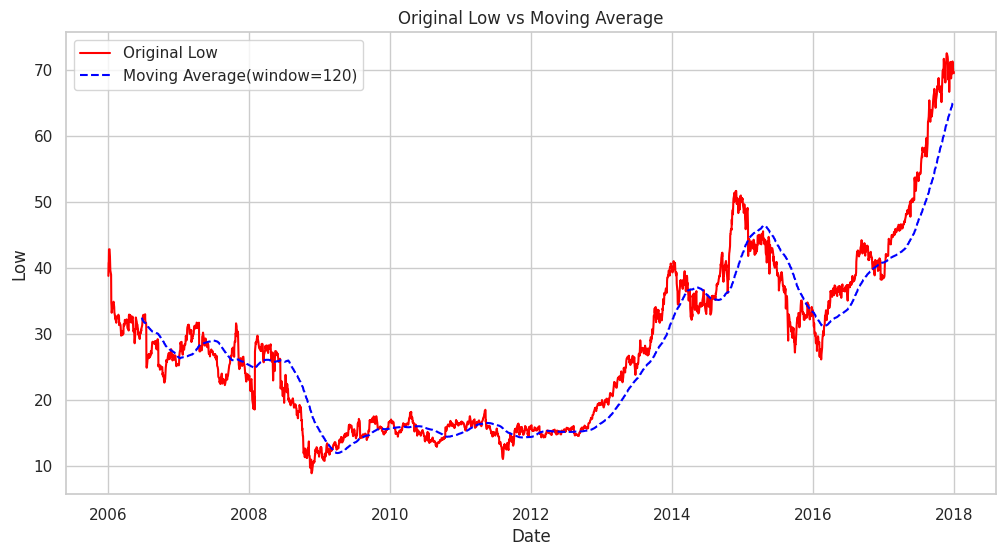

In [54]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'], label='Original Low',color='red')
plt.plot(df['low_smoothed'], label=f'Moving Average(window={window_size})',linestyle='--',color='blue')
plt.xlabel('Date')
plt.ylabel('Low')
plt.title("Original Low vs Moving Average")
plt.legend()
plt.show()

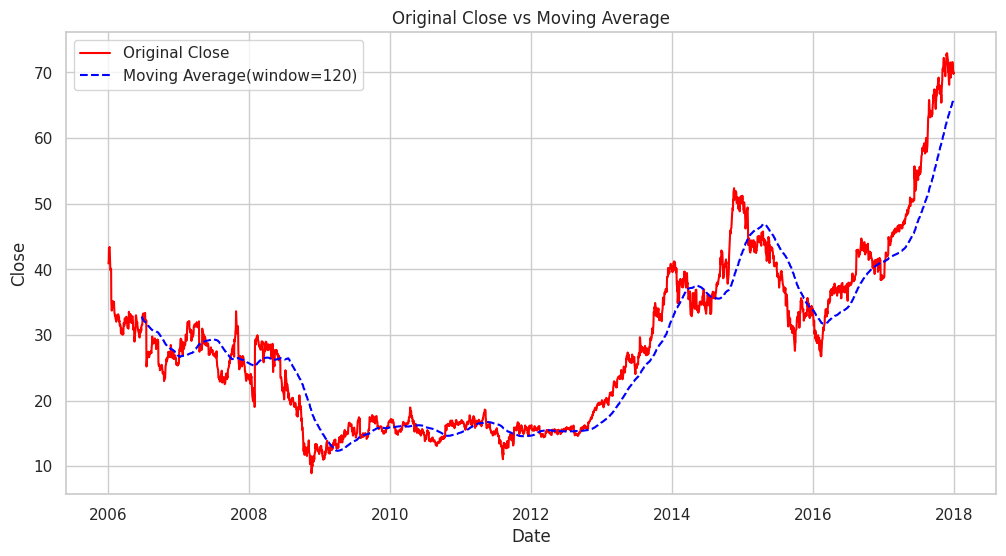

In [53]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Original Close',color='red')
plt.plot(df['close_smoothed'], label=f'Moving Average(window={window_size})',linestyle='--',color='blue')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title("Original Close vs Moving Average")
plt.legend()
plt.show()

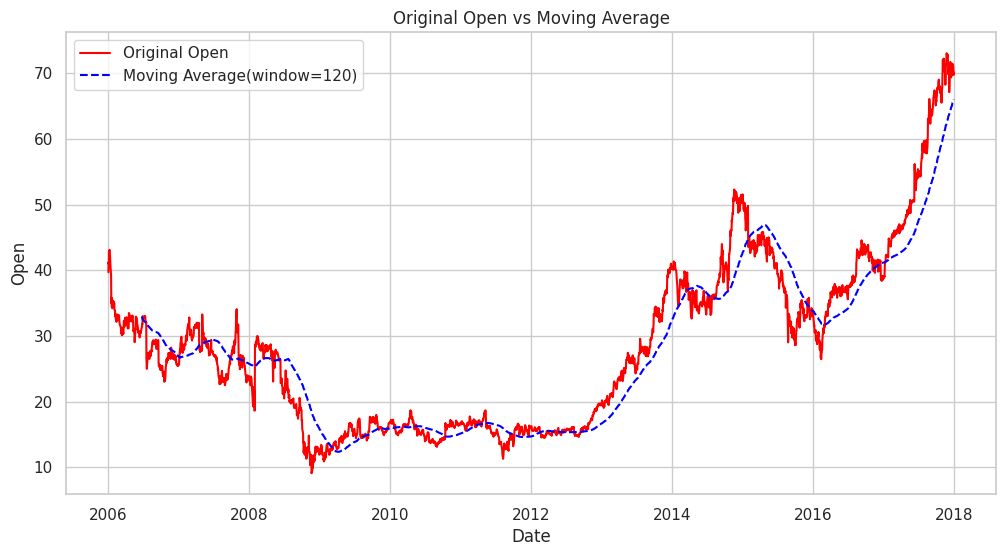

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'], label='Original Open',color='red')
plt.plot(df['open_smoothed'], label=f'Moving Average(window={window_size})',linestyle='--',color='blue')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title("Original Open vs Moving Average")
plt.legend()
plt.show()

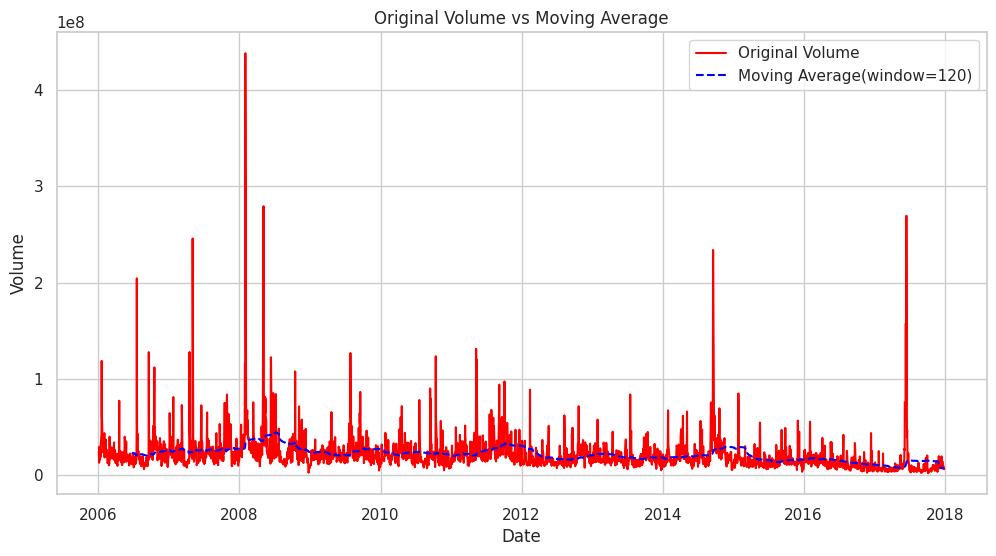

In [56]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'], label='Original Volume',color='red')
plt.plot(df['volume_smoothed'], label=f'Moving Average(window={window_size})',linestyle='--',color='blue')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Original Volume vs Moving Average")
plt.legend()
plt.show()

Showing High and high_diff side by side.

In [62]:
df_combined = pd.concat([df['High'], df['high_diff']], axis=1)

print(df_combined.head())

             High  high_diff
Date                        
2006-01-03  41.22        NaN
2006-01-04  41.90       0.68
2006-01-05  41.73      -0.17
2006-01-06  43.57       1.84
2006-01-09  43.66       0.09


Removing the null value.

Then let's perform ADF test on high_diff

In [63]:
df.dropna(subset=['high_diff'], inplace=True)
df['high_diff'].head()

,high_diff
Date,
2006-01-04,0.68
2006-01-05,-0.17
2006-01-06,1.84
2006-01-09,0.09
2006-01-10,-0.32


In [64]:
#ADF Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['high_diff'])
print('ADF Statistics : ', result[0])
print('p-value : ', result[1])
print('Critical Values : ', result[4])

ADF Statistics :  -12.148367478343204
p-value :  1.5912766134152125e-22
Critical Values :  {'1%': -3.4325316347197403, '5%': -2.862503905260741, '10%': -2.5672831121111113}


* Based on ADF Statistics less than Critical values so we reject all the null hypothesis.

* This suggests that data appears to be stationart according to Augumented Dickey-Fuller Test (AFD)

Thank you so much for going through my work till the end. Feel free to get in touch if you have any doubt about my work... :)